In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpmd_api as io

In [2]:
series = io.Series("diags/openPMD/monitor.h5", io.Access.read_only)

In [3]:
iterations = list(series.iterations)

In [4]:
len(iterations)

2

In [6]:
print(iterations)

[1, 27]


In [10]:
# Look at reduced beam quantties for each iteration

In [11]:
std_x = []
std_y = []
for i in iterations:
    std_x.append(series.iterations[i].particles['beam'].get_attribute('sig_x'))
    std_y.append(series.iterations[i].particles['beam'].get_attribute('sig_y'))

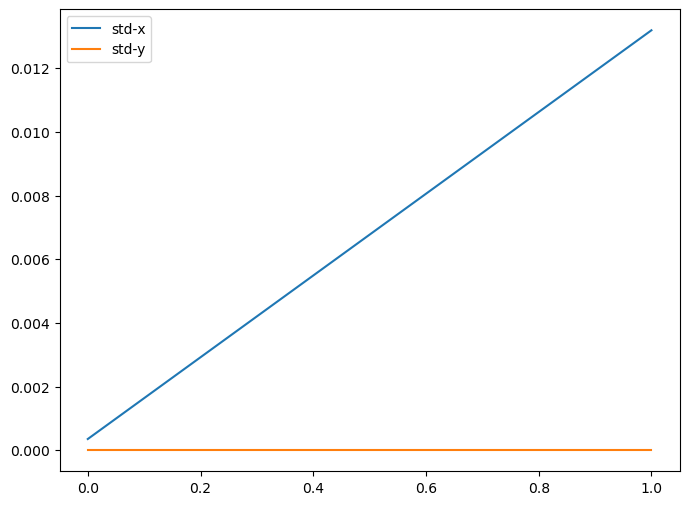

In [12]:
plt.plot(std_x, label='std-x')
plt.plot(std_y, label='std-y')
plt.legend(loc='best')

In [13]:
#series.close()

In [14]:
# How many particles are in the diagnostics?
beams_df = []
for i in iterations:
    beams_df.append(series.iterations[i].particles['beam'].to_df())

In [15]:
beams_df[0]['position_x'].shape

(16,)

In [16]:
emit_x = []
emit_y = []
beta_x = []
beta_y = []
for i in iterations:
    emit_x.append(series.iterations[i].particles['beam'].get_attribute('emittance_x'))
    beta_x.append(series.iterations[i].particles['beam'].get_attribute('beta_x'))
    emit_y.append(series.iterations[i].particles['beam'].get_attribute('emittance_y'))
    beta_y.append(series.iterations[i].particles['beam'].get_attribute('beta_y'))    

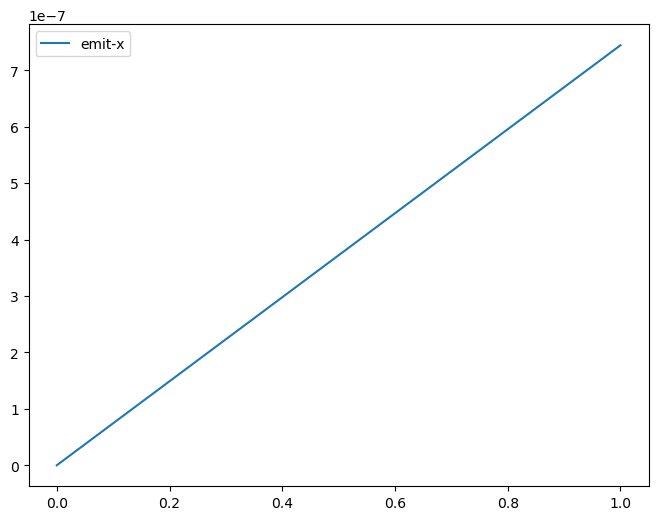

In [17]:
plt.plot(emit_x, label='emit-x')
plt.legend(loc='best')

In [18]:
emit_x

[0.0, 7.442095064135337e-07]

In [19]:
ref_particle = pd.read_csv('diags/ref_particle.0.0', delimiter=' ')

In [20]:
ref_particle.shape

(28, 13)

In [21]:
type(ref_particle)

pandas.core.frame.DataFrame

Text(0, 0.5, 'x')

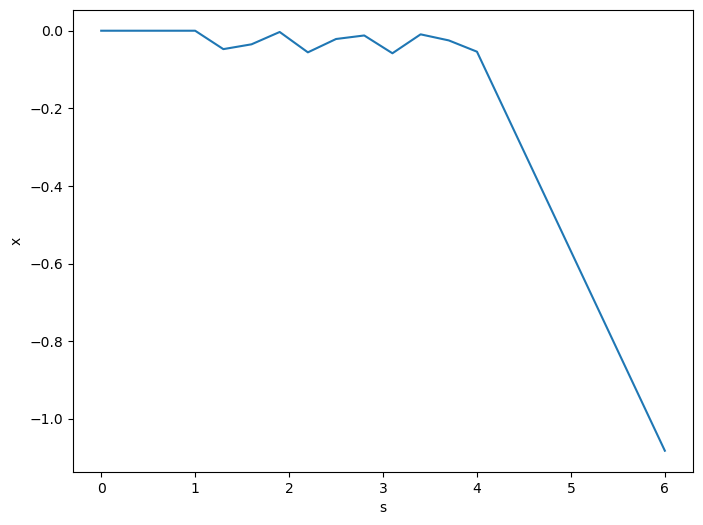

In [22]:
plt.plot(ref_particle['s'], ref_particle['x'])
plt.xlabel('s')
plt.ylabel('x')

In [23]:
ref_particle.columns

Index(['step', 's', 'beta', 'gamma', 'beta_gamma', 'x', 'y', 'z', 't', 'px',
       'py', 'pz', 'pt'],
      dtype='object')

In [24]:
ref_particle.shape

(28, 13)

In [25]:
ref_particle

,step,s,beta,gamma,beta_gamma,x,y,z,t,px,py,pz,pt
0,0,0.0,0.841811,1.852631,1.559565,0.000000,0,0.000000,0.000000,0.000000,0,1.559565,-1.852631
1,1,0.0,0.841811,1.852631,1.559565,0.000000,0,0.000000,0.000000,0.000000,0,1.559565,-1.852631
2,2,0.2,0.841811,1.852631,1.559565,0.000000,0,0.200000,0.237583,0.000000,0,1.559565,-1.852631
3,3,0.4,0.841811,1.852631,1.559565,0.000000,0,0.400000,0.475166,0.000000,0,1.559565,-1.852631
4,4,0.6,0.841811,1.852631,1.559565,0.000000,0,0.600000,0.712749,0.000000,0,1.559565,-1.852631
5,5,0.8,0.841811,1.852631,1.559565,0.000000,0,0.800000,0.950332,0.000000,0,1.559565,-1.852631
6,6,1.0,0.841811,1.852631,1.559565,0.000000,0,1.000000,1.187916,0.000000,0,1.559565,-1.852631
7,7,1.3,0.841811,1.852631,1.559565,-0.047432,0,0.977424,1.544290,1.210383,0,-0.983471,-1.852631
8,8,1.6,0.841811,1.852631,1.559565,-0.035042,0,1.028473,1.900665,-1.526550,0,-0.319199,-1.852631
9,9,1.9,0.841811,1.852631,1.559565,-0.003236,0,0.986665,2.257039,0.714920,0,1.386049,-1.852631


In [26]:
ref_particle.shape

(28, 13)

Text(0, 0.5, 'z')

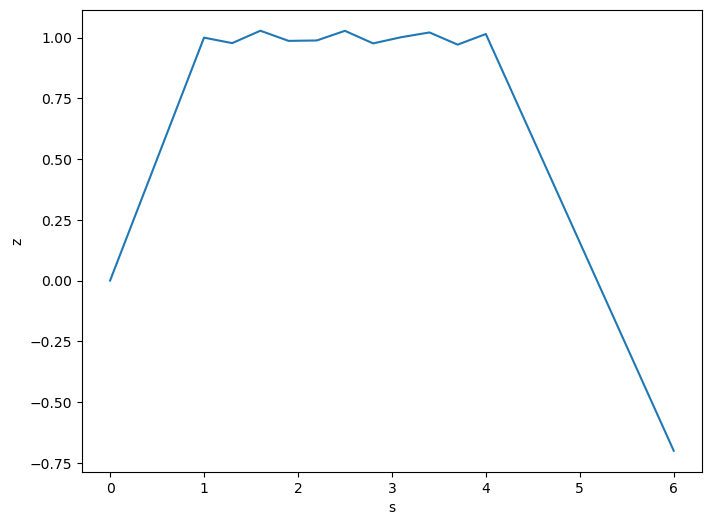

In [27]:
plt.plot(ref_particle['s'], ref_particle['z'])
plt.xlabel('s')
plt.ylabel('z')

Text(0, 0.5, 't')

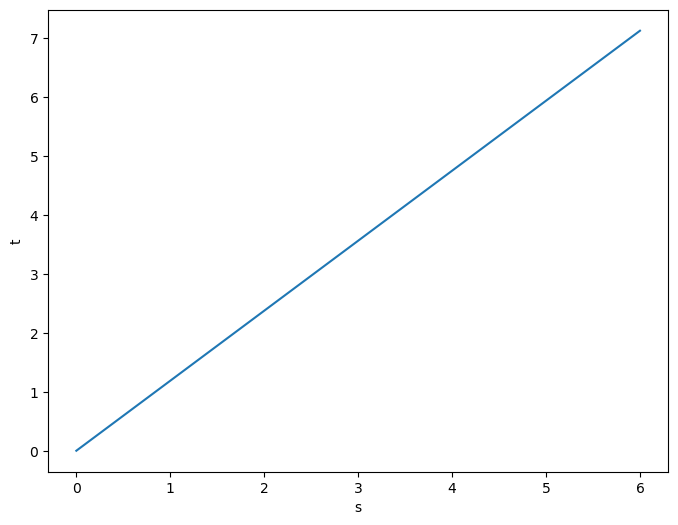

In [28]:
plt.plot(ref_particle['s'], ref_particle['t'])
plt.xlabel('s')
plt.ylabel('t')

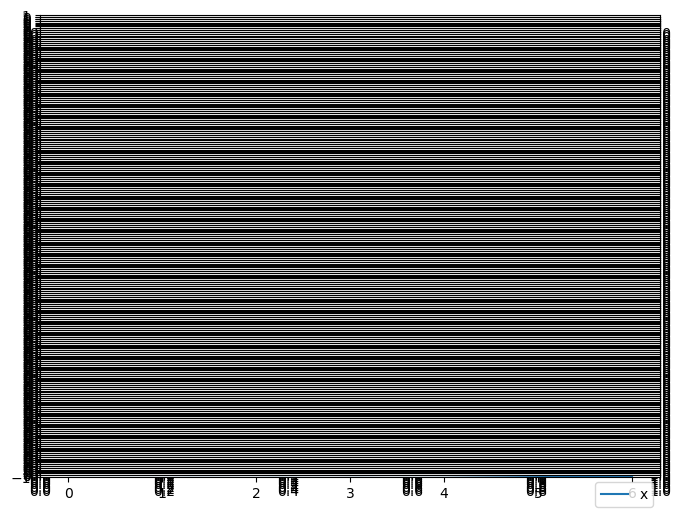

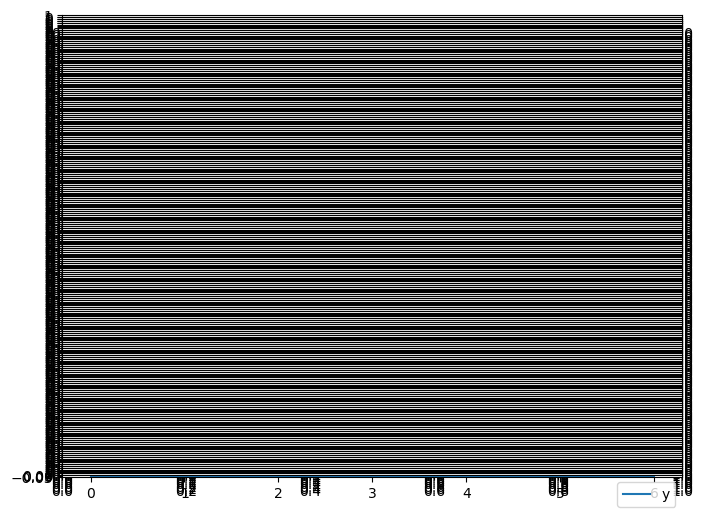

In [30]:
plt.subplots(211)
plt.plot(ref_particle['s'], ref_particle['x'], label='x')
plt.legend(loc='best')
plt.subplots(212)
plt.plot(ref_particle['s'], ref_particle['y'], label='y')
plt.legend(loc='best')

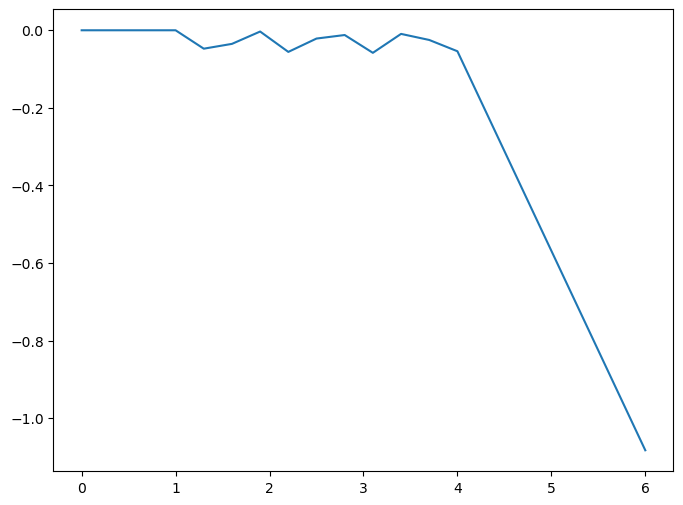

In [31]:
plt.plot(ref_particle['s'], ref_particle['x'])

In [32]:
ref_particle['z']

0     0.000000
1     0.000000
2     0.200000
3     0.400000
4     0.600000
5     0.800000
6     1.000000
7     0.977424
8     1.028473
9     0.986665
10    0.988345
11    1.028034
12    0.976298
13    1.001859
14    1.021358
15    0.971205
16    1.014959
17    0.843434
18    0.671908
19    0.500382
20    0.328856
21    0.157330
22   -0.014196
23   -0.185722
24   -0.357247
25   -0.528773
26   -0.700299
27   -0.700299
Name: z, dtype: float64

In [33]:
type(ref_particle['x'])

pandas.core.series.Series

In [34]:
ref_particle['x'].shape

(28,)